In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

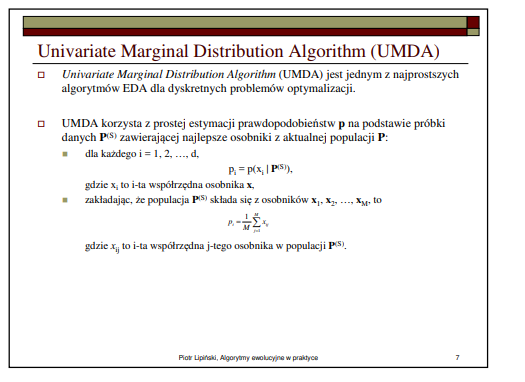

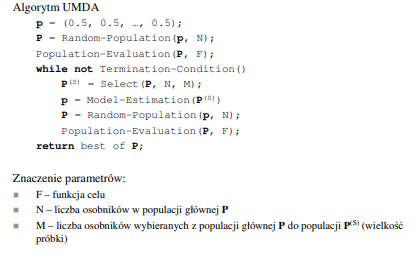

In [ ]:
def Random_Population(p, N):
    length = len(p) 
    P = np.zeros((N, length))
    randoms = np.random.random_sample((N,length))
    for index, x in enumerate(randoms):
        p_row = np.where(x< p,1,0)
        P[index] = p_row
    return P    

def Select(P, N, M, objective_values):
    indexs = np.flip(np.argsort(objective_values))[:M]

    best_individuals = P[indexs]
    return best_individuals

def Model_Estimation(Ps):
    length = Ps.shape[1]
    M = Ps.shape[0]
    p = np.zeros(length)
    for x in range(length):
        p[x] = 1/M * np.sum(Ps[:,x])
    return p


def Best_Worst_Individual(a, func):
    indexs = np.flip(np.argsort(func(a)))
    return a[indexs[0]], a[indexs[1]]

def Random_Individual(p):
    length = len(p) 
    P = np.zeros(length)
    randoms = np.random.random_sample(length)
    P = np.where(randoms < p,1,0)
    return P    



def OneMax(P):
    return np.sum(P, axis=1)

def DeceptiveOneMax(P):
    length = len(P[0])
    P = np.sum(P,axis=1)
    for index,x in enumerate(P):
        if x == 0:
            P[index] = length + 1
    return P 




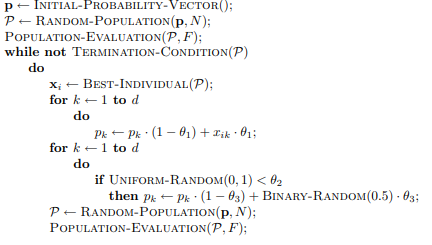

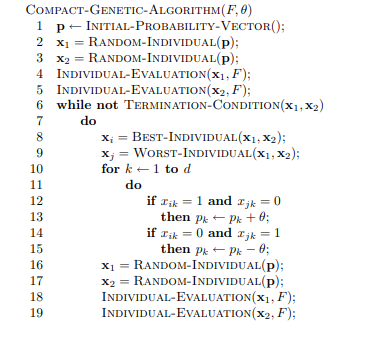

In [ ]:

def UMDA(N, M, func, length, iter = 200):
    p = np.ones(length) / 2 
    P = Random_Population(p, N)
    objective_values = func(P)
    i = 0
    while i < iter:
        i +=1
        Ps = Select(P, N, M, objective_values)
        p = Model_Estimation(Ps)
        P = Random_Population(p, N)
        objective_values = func(P)
        if func== OneMax:
            if (P[0] == np.ones(length)).all():
                print('UMDA')
                print(i)
                break
        if func== DeceptiveOneMax:
            if (P[0] == np.ones(length)).all():
                print('UMDA')
                print(i)
                break
    return P[0]



def PBIL(N, func, length,t0, t1,t2, iter=200):
    p = np.ones(length) / 2 
    P = Random_Population(p, N)
    objective_values = func(P)
    i =0
    while i < iter:
        i+=1
        best_individual = Select(P, N, N, objective_values)[0]
        for x in range(length):
            p[x] = p[x] * (1 - t0) + best_individual[x] * t0
        for x in range(length):
            if np.random.uniform() < t1:
                p[x] = p[x] * (1 - t2) +  (1 - np.round(np.random.uniform())) * t2
        P = Random_Population(p, N)
        objective_values = func(P)

        if func== OneMax:
            if (P[0] == np.ones(length)).all():
                print('PBIL')
                print(i)
                break
        if func== DeceptiveOneMax:
            if (P[0] == np.ones(length)).all():
                print('PBIL')
                print(i)
                break

    return Select(P,N,N, objective_values)[0]


def CGA(N, func, length, t0, iter = 200):
    p = np.ones(length) / 2
    x1 = Random_Individual(p)
    x2 = Random_Individual(p)
    i = 0
    while i < iter:
        i +=1
        xi,xj = Best_Worst_Individual([x1,x2], OneMax)
        diff = np.where(xi != xj)[0]
        for x in diff:
            if xi[x] == 1:

                p[x] += t0
            else:
                p[x] -=  t0
        if func== OneMax:
            if (list(xi) == list(np.ones(length))):
                print('CGA')
                print(i)
                break
        x1 = Random_Individual(p)
        x2 = Random_Individual(p)

    return xi

#CGA(125, OneMax, 100, 1/10, iter=500000)
UMDA(125,50,OneMax, 100, iter = 1000)
PBIL(125,OneMax, 100, t0 = 0.01, t1=0.05, t2 = 0.01, iter = 1000)



UMDA
14
PBIL
570


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#print(CGA(125, DeceptiveOneMax, 100, 1/10, iter=1000000))
print(UMDA(125,50,DeceptiveOneMax, 100, iter = 1000))
print(PBIL(125,DeceptiveOneMax, 100, t0 = 0.1, t1=0.01, t2 = 0.45, iter = 1000))


UMDA
13
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
PBIL
101
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


## Lista 6 zadanie 3

In [ ]:
!pip install git+https://github.com/baopng/NSGA-II.git

  Cloning https://github.com/baopng/NSGA-II.git to /tmp/pip-req-build-240ug4rm
  Running command git clone -q https://github.com/baopng/NSGA-II.git /tmp/pip-req-build-240ug4rm
  Created wheel for nsga-2: filename=nsga_2-0.1-cp36-none-any.whl size=4644 sha256=d7e7e69d47476e40a8bcff97764cb4903c22a412dd9a1c4cec180a79e33630a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-xhcbyngj/wheels/e5/2a/3d/8ea13aff66489365c34c66bc0f0014906957109d587e882240
Successfully built nsga-2


In [ ]:
from nsga2.problem import Problem
from nsga2.evolution import Evolution
import matplotlib.pyplot as plt
import math

#SCH 


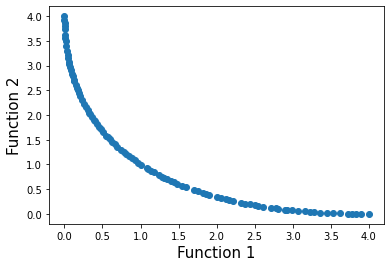

In [ ]:
def f1(x):
    return x**2

def f2(x):
    return (x-2)**2

problem = Problem(num_of_variables=1, objectives=[f1, f2], variables_range=[(-10**3, 10**3)])
evo = Evolution(problem)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

In [ ]:
print(function1)
print(function2)
print(evol[0].objectives)

[3.999037149072365, 3.8989120333255705, 3.8367388930447786, 3.7783982396653837, 3.7197987487243367, 3.623735463894099, 3.53471549082563, 3.4516258618463826, 3.353556446470824, 3.2826893647727293, 3.2302876257516617, 3.1549342052823484, 3.0671182669417334, 2.9906698573556465, 2.928730681028199, 2.902046000317558, 2.8039990679873332, 2.781510150627872, 2.7112308607067734, 2.6102032696734905, 2.5409201928893204, 2.498035518814429, 2.4330709595644033, 2.378196136179018, 2.3201000931065883, 2.2168407342193466, 2.164519423610983, 2.1183208364824546, 2.0541370379867936, 1.9998584717623529, 1.8961013319611661, 1.8611384527005552, 1.817702941032232, 1.7539921324856618, 1.6964127369972488, 1.5930554899047527, 1.5445043740062185, 1.4854128660677544, 1.443799100371654, 1.400183574373911, 1.3450992817258458, 1.3115352043103874, 1.2787557295823127, 1.2465841207012147, 1.1765570441157573, 1.142785475227165, 1.1032398133120012, 1.0815967620398739, 1.0064200231332958, 0.9624687064206733, 0.921008320613

#KUR

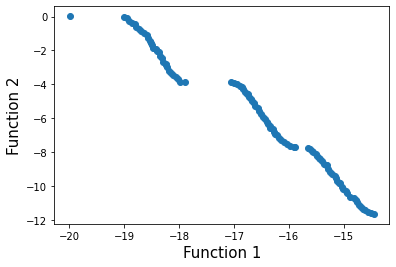

In [ ]:
def f1(x):
    s = 0
    for i in range(len(x)-1):
        s += -10*math.exp(-0.2*math.sqrt(x[i]**2 + x[i+1]**2))
    return s

def f2(x):
    s = 0
    for i in range(len(x)):
        s += abs(x[i])**0.8 + 5*math.sin(x[i]**3)
    return s

problem = Problem(num_of_variables=3, objectives=[f1, f2], variables_range=[(-5, 5)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
func = [i.objectives for i in evo.evolve()]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

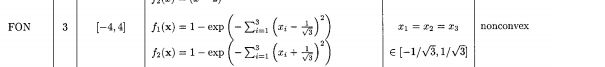

#FON

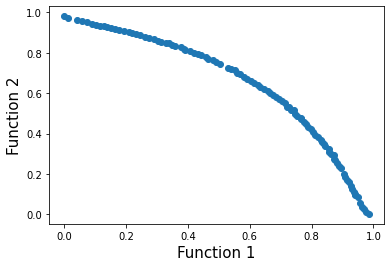

In [ ]:
def f1(x):
    s=0
    sq = 1/np.sqrt(3)

    for i in range(len(x)):
        s += math.pow(x[i] - sq,2)
    return 1 - np.exp(-s)

def f2(x):
    s=0
    sq = 1/np.sqrt(3)

    for i in range(len(x)):
        s += math.pow(x[i] + sq,2)
    return 1 - np.exp(-s)




problem = Problem(num_of_variables=3, objectives=[f1, f2], variables_range=[(-4, 4)], same_range=True, expand=False)
evo = Evolution(problem)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()